# TASK - 03

# Build a decision tree classifier to predict weather a
# customer will purchase a product or service based on their
# demographic and behavioral data. Use a dataset such as the
# Bank Marketing dataset from the UCI Machine Learning  Repository.

# Sample Dateset :-
# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [38]:
# work as testing dataset
Bank_df = pd.read_csv("C:/Users/PUNEET/Downloads/bank-additional/bank-additional.csv", sep=';')
Bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [39]:
# work as training dataset
Full_bank_df = pd.read_csv("C:/Users/PUNEET/Downloads/bank-additional/bank-additional-full.csv", sep=';')
Full_bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
Full_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [18]:
Full_bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [40]:
Full_bank_df.drop_duplicates(inplace = True)
Full_bank_df.duplicated().sum()

np.int64(0)

In [41]:
Bank_df.drop_duplicates(inplace = True)
Bank_df.duplicated().sum()

np.int64(0)

In [42]:
# Replace 'unknown' with the most frequent value in each column

for col in Full_bank_df.select_dtypes(include = 'object'):
    most_frequent = Full_bank_df[col].mode()[0]
    Full_bank_df[col] = Full_bank_df[col].replace('unknown', most_frequent)

# Confirm replacement
for col in Full_bank_df.select_dtypes(include = 'object'):
    print(f"{col} - 'unknown' count after cleaning: {(Full_bank_df[col] == 'unknown').sum()}")


In [43]:
# Replace 'unknown' with the most frequent value in each column

for col in Bank_df.select_dtypes(include = 'object'):
    most_frequent = Bank_df[col].mode()[0]
    Bank_df[col] = Bank_df[col].replace('unknown', most_frequent)

# Confirm replacement
for col in Bank_df.select_dtypes(include = 'object'):
    print(f"{col} - 'unknown' count after cleaning: {(Bank_df[col] == 'unknown').sum()}")


In [31]:
# Convert target to binary
# Full_bank_df['y'] = Full_bank_df['y'].map({'yes': 1, 'no': 0})

# # Label encode categorical variables
# categorical_cols = Full_bank_df.select_dtypes(include='object').columns

# le = LabelEncoder()
# for col in categorical_cols:
#     Full_bank_df[col] = le.fit_transform(Full_bank_df[col])

In [44]:
categorical_cols = Full_bank_df.select_dtypes(include='object').columns.drop('y')
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    Full_bank_df[col] = le.fit_transform(Full_bank_df[col])
    Bank_df[col] = le.transform(Bank_df[col])  # transform with train encodings only
    le_dict[col] = le

# Encode target column 'y'
Full_bank_df['y'] = Full_bank_df['y'].map({'yes': 1, 'no': 0})
Bank_df['y'] = Bank_df['y'].map({'yes': 1, 'no': 0})

# Drop 'duration' to prevent data leakage
X_train = Full_bank_df.drop(columns=['y', 'duration'])
y_train = Full_bank_df['y']

X_test = Bank_df.drop(columns=['y', 'duration'])
y_test = Bank_df['y']

In [49]:
clf = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9045884923525127
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3668
           1       0.65      0.29      0.40       451

    accuracy                           0.90      4119
   macro avg       0.78      0.63      0.67      4119
weighted avg       0.89      0.90      0.89      4119

[[3597   71]
 [ 322  129]]


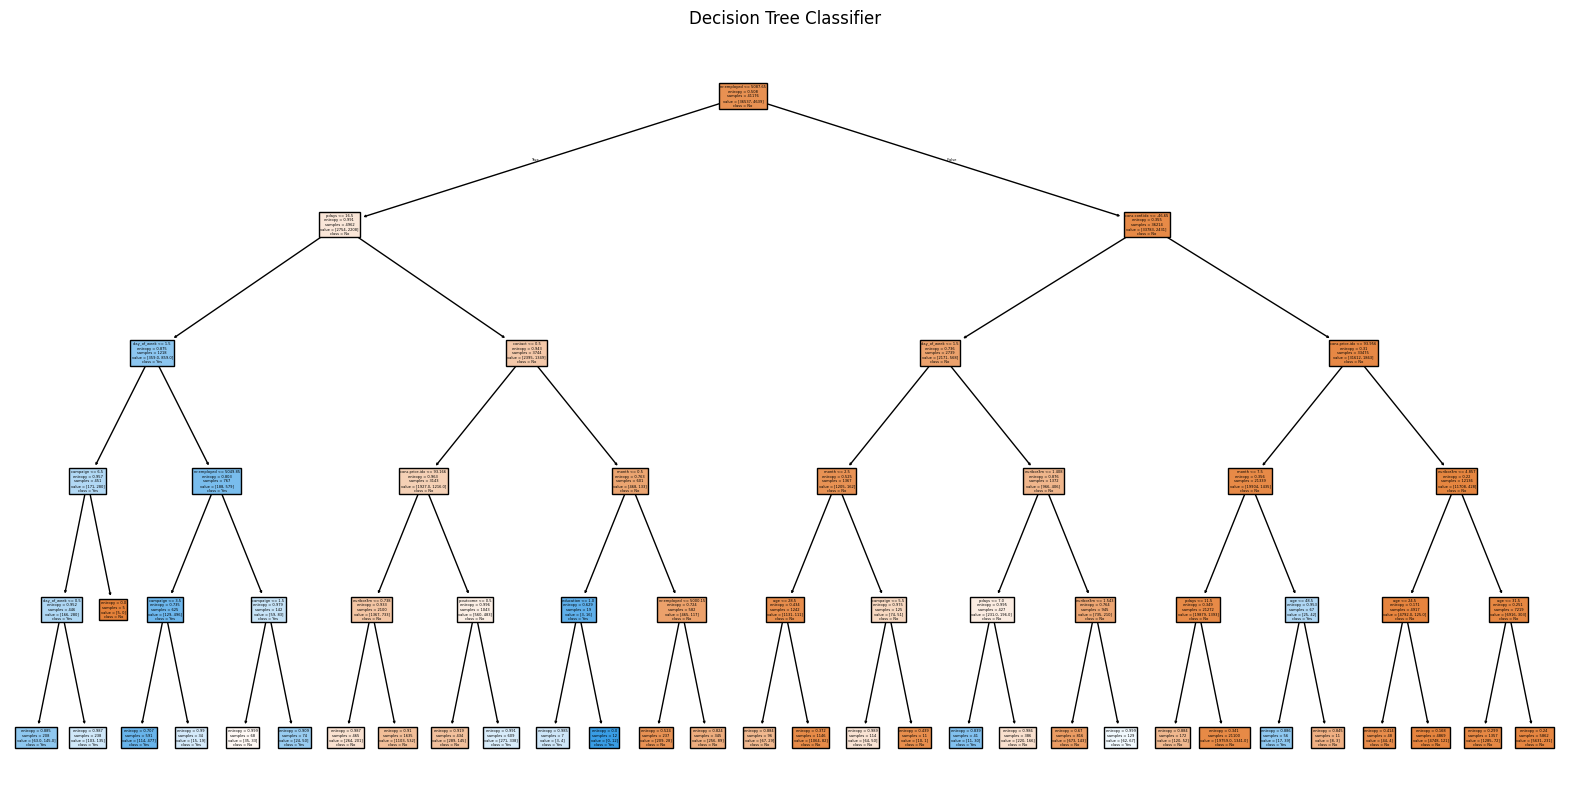

In [51]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Classifier")
plt.show()


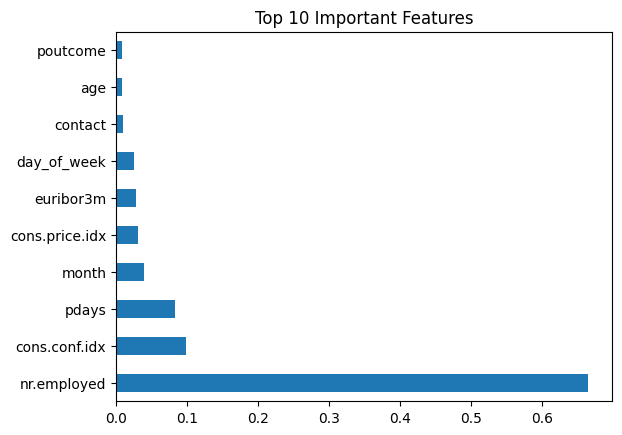

In [52]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()
